<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">
<h1>Machine Learning Lab 6: Decision Tree Classification </h1>
Name: Deshmukh Pratik Bhushanrao <br>
Roll No: 2448513
</div>

In [8]:
%pip install seaborn matplotlib scikit-learn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

#inferenceimporting the essential libraries

In [10]:
df = pd.read_excel('employee_data.xlsx')
df.head()

#importing the dataset

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:150%">1. Data Exploration and Visualization: </div>

In [11]:
df.info()

# checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [12]:
df.isna().sum()

#checking for null values

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [13]:
df.shape

#checking the shape of the dataset

(14249, 10)

In [14]:
df.describe()

#checking the descriptive statistics

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [15]:
df.drop(['filed_complaint', 'recently_promoted'], axis=1, inplace=True)
df.head()

#dropping the unnecessary columns

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,NaN,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


In [16]:
df.isna().sum()

#again checking for null values

avg_monthly_hrs       0
department          709
last_evaluation    1532
n_projects            0
salary                0
satisfaction        181
status                0
tenure              181
dtype: int64

<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:125%"> Data imputation </div>

In [17]:
df['department'].fillna(df['department'].mode()[0], inplace=True)
df['last_evaluation'].fillna(df['last_evaluation'].mean(), inplace=True)
df['satisfaction'].fillna(df['satisfaction'].mean(), inplace=True)
df['tenure'].fillna(df['tenure'].mean(), inplace=True)


#filling the missing values

C:\Users\prati\AppData\Local\Temp\ipykernel_10012\541560391.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['department'].fillna(df['department'].mode()[0], inplace=True)
C:\Users\prati\AppData\Local\Temp\ipykernel_10012\541560391.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [18]:
df.isna().sum()

#checking for null values

avg_monthly_hrs    0
department         0
last_evaluation    0
n_projects         0
salary             0
satisfaction       0
status             0
tenure             0
dtype: int64

In [19]:
df.head()

#checking the dataset

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,engineering,0.932868,4,low,0.829896,Left,5.0
1,232,support,0.718477,3,low,0.834544,Employed,2.0
2,184,sales,0.788830,3,medium,0.834988,Employed,3.0
3,206,sales,0.575688,4,low,0.424764,Employed,2.0
4,249,sales,0.845217,3,low,0.779043,Employed,3.0


In [20]:
df['department'].unique()

#checking for unique values

array(['engineering', 'support', 'sales', 'IT', 'product', 'marketing',
       'temp', 'procurement', 'finance', 'management',
       'information_technology', 'admin'], dtype=object)

visualizations

<Axes: xlabel='tenure', ylabel='Count'>

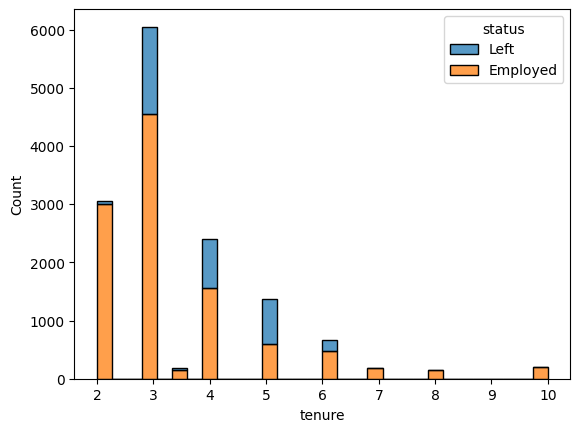

In [21]:
sns.histplot(data=df,x='tenure',hue='status',bins=30,multiple='stack')

#checking the distribution of the target variable

<Axes: xlabel='satisfaction', ylabel='status'>

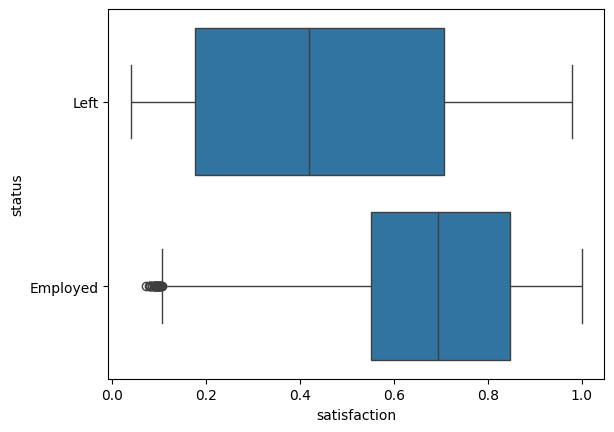

In [22]:
sns.boxplot(data=df,x='satisfaction',y='status')

#checking for outliers

In [23]:
import matplotlib.pyplot as plt

[]

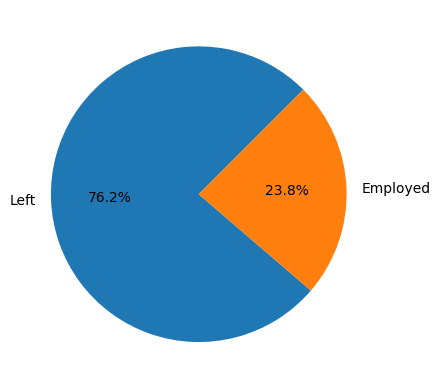

In [24]:
plt.pie(df["status"].value_counts(),labels=df["status"].unique(),autopct='%1.1f%%', startangle=45)
plt.plot()

#checking the distribution of the target variable

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

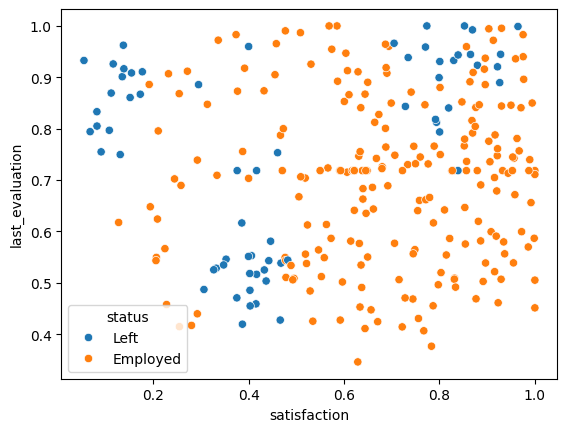

In [25]:
sns.scatterplot(data=df[::50],x='satisfaction',y='last_evaluation',hue='status')

#checking for correlation

Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['department'] = le.fit_transform(df['department'])
df['salary'] = le.fit_transform(df['salary'])
df['status'] = le.fit_transform(df['status'])
df.head()

#encoding the categorical variables

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,status,tenure
0,221,2,0.932868,4,1,0.829896,1,5.0
1,232,10,0.718477,3,1,0.834544,0,2.0
2,184,9,0.788830,3,2,0.834988,0,3.0
3,206,9,0.575688,4,1,0.424764,0,2.0
4,249,9,0.845217,3,1,0.779043,0,3.0


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(df.drop('status', axis=1)), columns=df.columns.drop('status'))
df_scaled = pd.concat([x, df['status']], axis=1)
df_scaled.head()

#standardizing(scaling) the dataset

,avg_monthly_hrs,department,last_evaluation,n_projects,salary,satisfaction,tenure,status
0,0.415794,-1.205166,1.311357,0.180508,-0.561893,0.838210,1.035283,1
1,0.631493,1.055552,0.000000,-0.617524,-0.561893,0.856885,-1.031463,0
2,-0.309740,0.772962,0.430327,-0.617524,1.040992,0.858668,-0.342548,0
3,0.121659,0.772962,-0.873391,0.180508,-0.561893,-0.789711,-1.031463,0
4,0.964847,0.772962,0.775231,-0.617524,-0.561893,0.633869,-0.342548,0


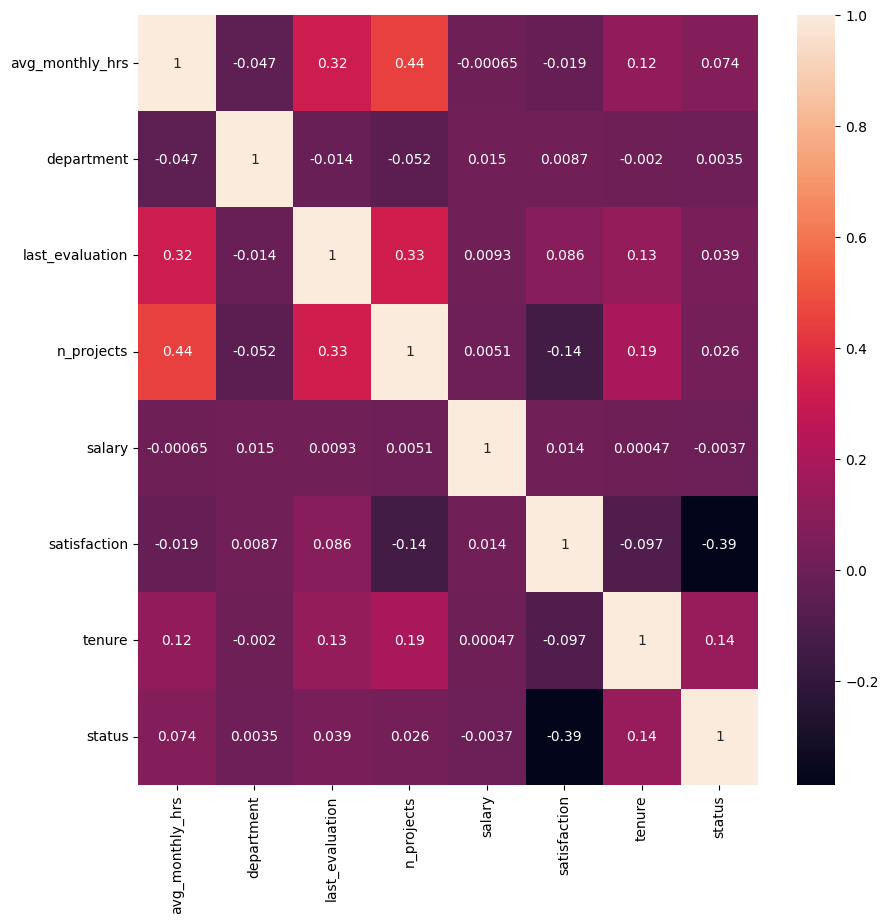

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df_scaled.corr(), annot=True)
plt.show()

#checking for correlation

<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:150%"> 2. Decision Tree Modeling with Tree Pruning and Split Criteria:

Split the dataset into a training set and a testing set (e.g., 80% training, 20% testing).

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('status', axis=1), df_scaled['status'], test_size=0.2, random_state=42)

#splitting the dataset into train and test sets with 80:20 ratio

Build a decision tree classifier to predict employee attrition based on selected features (e.g., tenure, satisfaction, number of projects). </div>

In [30]:
from sklearn.tree import DecisionTreeClassifier
cnf_gini = DecisionTreeClassifier(criterion='gini')
cnf_gini.fit(X_train, y_train)
y_pred = cnf_gini.predict(X_test)

cnf_gini.score(X_test, y_test)

#checking building the model with Gini impurity criterion and checking the accuracy

0.9592982456140351

In [31]:
cnf_entropy = DecisionTreeClassifier(criterion='entropy')
cnf_entropy.fit(X_train, y_train)
y_pred = cnf_entropy.predict(X_test)

cnf_entropy.score(X_test, y_test)

#checking building the model with Entropy criterion and checking the accuracy

0.9659649122807018

Visualize the decision tree structure. How deep is the tree, and what are the most influential features for predicting attrition?

[]

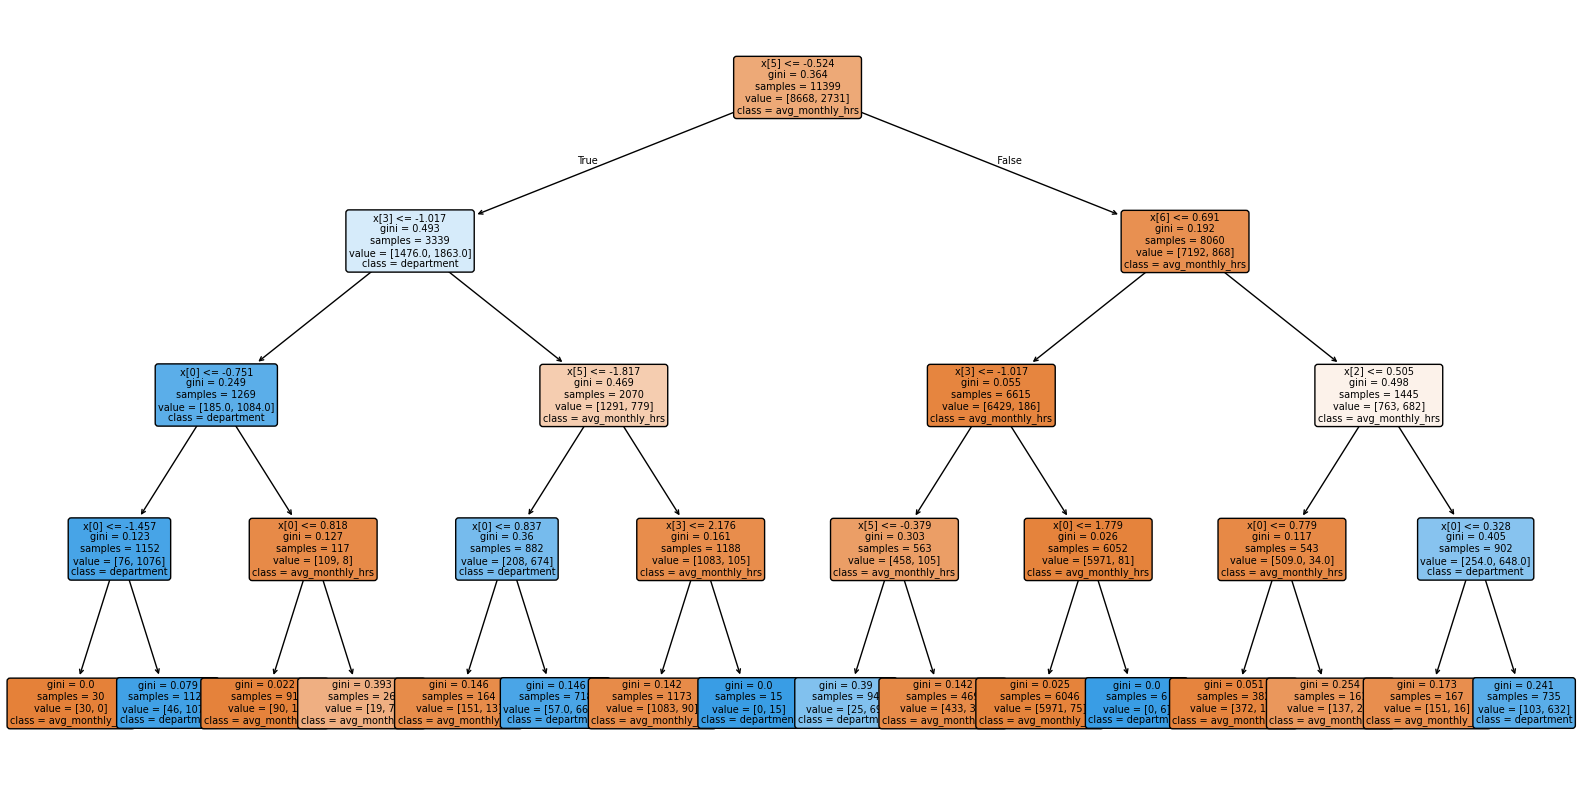

In [32]:
from sklearn.tree import export_text, plot_tree

example_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=5).fit(X_train, y_train)
plt.figure(figsize=(20, 10))
plot_tree(example_tree, class_names=X_train.columns, filled=True, rounded=True, fontsize=7)
plt.plot()

#plotting the decision tree

Apply post-pruning techniques to control the complexity of the tree and prevent overfitting. Experiment with different pruning strategies, such as minimum leaf size or maximum depth, to find the optimal tree size

In [33]:
path = cnf_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pruned_models = []

for ccp_alphas in ccp_alphas:
    pruned_model = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alphas).fit(X_train, y_train)
    pruned_models.append(pruned_model)

best_accuracy = 0
best_pruned_model = None

for pruned_model in pruned_models:
    accuracy = pruned_model.score(X_test, y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_pruned_model = pruned_model

# finding the best pruned model based on accuracy

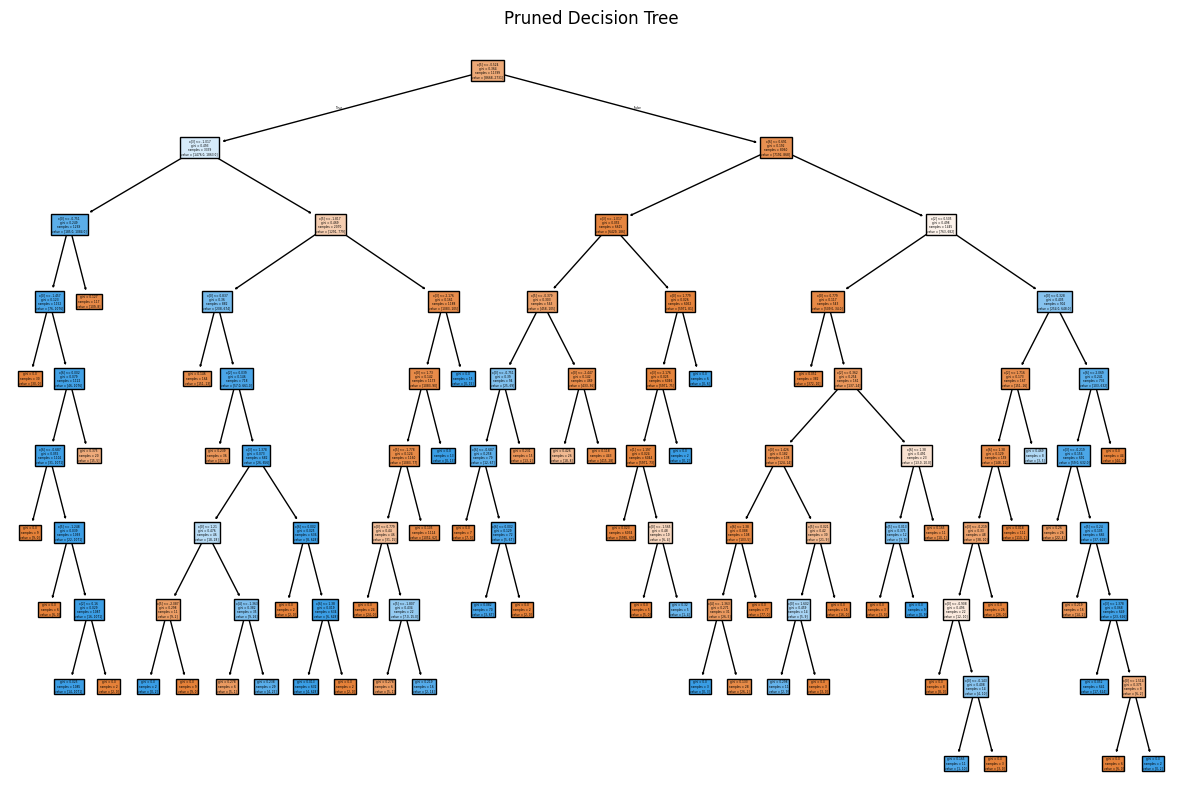

In [34]:
plt.figure(figsize=(15, 10))
plot_tree(best_pruned_model, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# plotting the pruned decision tree

In [35]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()
params = {
    'criterion': ['gini','entropy'],
    'max_depth': list(np.random.randint(2, 20, 1)),
    'min_samples_leaf': [1,2,4,6]
}
search = GridSearchCV(model, params, scoring='accuracy').fit(X_train, y_train)

#finding the best model

In [36]:
print(search.best_params_)
print(search.best_score_)

#finding the best parameters and best score

{'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 4}
0.962277699514253


In [37]:
bestModel = search.best_estimator_
y_pred = bestModel.predict(X_test)
bestModel.score(X_test, y_test)

#checking the accuracy of the best model

0.9729824561403508

<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:150%">3. Model Evaluation 

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat, end="\n\n")
print(classification_report(y_test, y_pred))

#checking the confusion matrix and classification report

[[2155   34]
 [  43  618]]

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2189
           1       0.95      0.93      0.94       661

    accuracy                           0.97      2850
   macro avg       0.96      0.96      0.96      2850
weighted avg       0.97      0.97      0.97      2850



<div style="color:#fff;display:fill;border-radius:10px;background-color:#3c968b;text-align:left;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:150%"> 4. Feature Importance Visualization:

C:\Users\prati\AppData\Local\Temp\ipykernel_10012\342439456.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=labels, x=[tp, tn, fp, fn], palette=['green', 'green', 'red', 'red'])


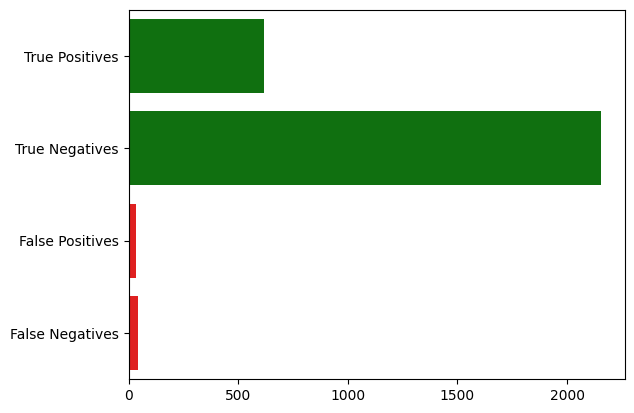

In [40]:
tn, fp, fn, tp = conf_mat.ravel()
labels = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']

sns.barplot(y=labels, x=[tp, tn, fp, fn], palette=['green', 'green', 'red', 'red'])
plt.show()

#plotting the confusion matrix with barchart

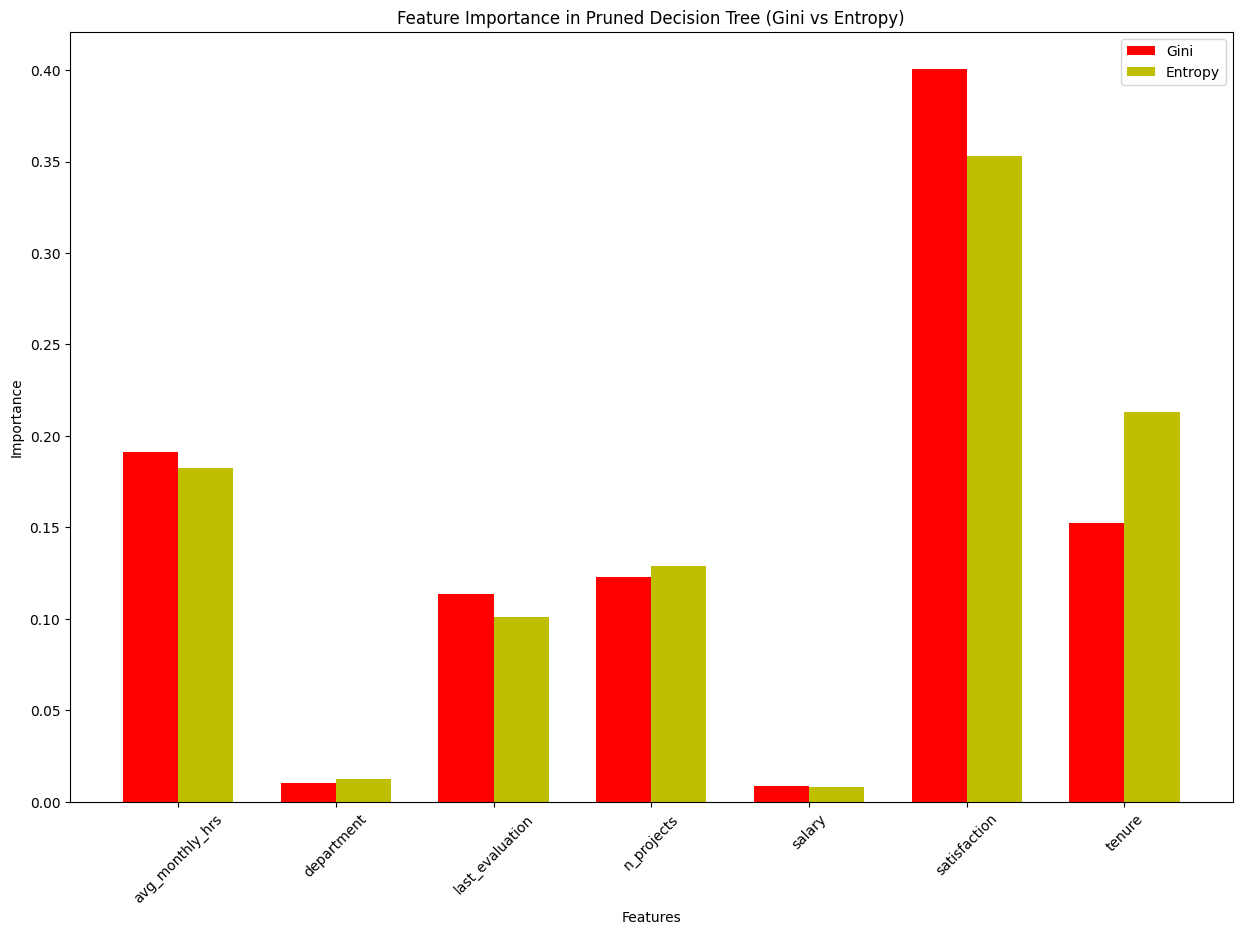

In [41]:
entropy_imp = cnf_entropy.feature_importances_
gini_imp = cnf_gini.feature_importances_
features = X_test.columns

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 10))
bar_width = 0.35
index = np.arange(len(features))

# Gini bar chart
bar1 = plt.bar(index, gini_imp, bar_width, label='Gini', color='r')

# Entropy bar chart
bar2 = plt.bar(index + bar_width, entropy_imp, bar_width, label='Entropy', color='y')

# Adding Labels and Titles
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance in Pruned Decision Tree (Gini vs Entropy)')
plt.xticks(index + bar_width / 2, features, rotation=45)
plt.legend()


plt.show()

#plotting the feature importance after pruning

# -------------------EOD------------------